# Assignment 4
Name: Max Yuhas <br>
Professor: Smita Kirshnaswamy <br>
TA: Matthew Amodio <br>

## Problem 1 - Convolution Neural Networks

### Part 1-2: `tf.conv1_1.py`
1. Explain `image = china[150:220, 130:250]`.
2. Explain what is going on in lines 71-72.

(1, 70, 120, 1)  


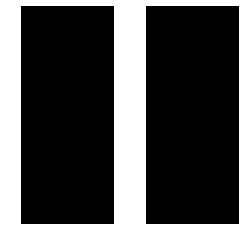

press return 11


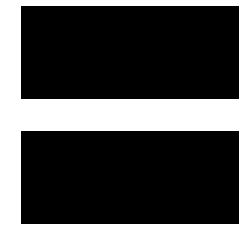

press return 22
Saving figure china_original


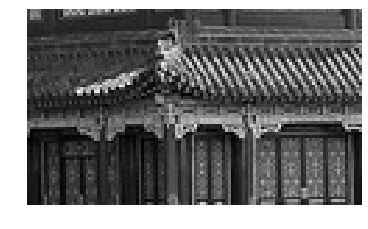

press return 33
Saving figure china_vertical


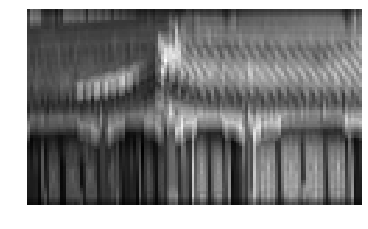

press return 44
Saving figure china_horizontal


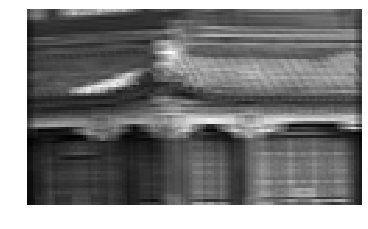

In [4]:
# Demonstrate tensorflow convolution 1
# from 13_convolutional_network.ipynb from Geron's github


# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
# matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/max_yuhas/Dropbox/Yale/Junior/CPSC 663/Assignment4"
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
	# make sure the directories are made before saving!
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")    

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

print(images.shape," ")

# create two convolutive maps, a vertical bar and a horizontal bar

fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1   # make a column vector 
fmap[3, :, 0, 1] = 1   # make a row vector
fmap[:, :, 0, 0]
plot_image(fmap[:, :, 0, 0])
plt.show()
input('press return 1')
plot_image(fmap[:, :, 0, 1])
plt.show()
input('press return 2')


reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
#Begin lines 71-72 --------------------------
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME", use_cudnn_on_gpu=False)
#End lines 71-72 ----------------------------

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

plot_image(images[0, :, :, 0])
save_fig("china_original", tight_layout=False)
plt.show()
input('press return 3')

plot_image(output[0, :, :, 0])
save_fig("china_vertical", tight_layout=False)
plt.show()
input('press return 4')

plot_image(output[0, :, :, 1])
save_fig("china_horizontal", tight_layout=False)
plt.show()

(1, 70, 120, 1)  


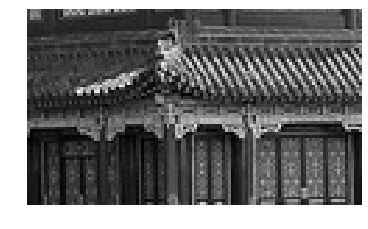

In [5]:
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

print(images.shape," ")
plot_image(images[0, :, :, 0])
#save_fig("china_original", tight_layout=False)
plt.show()

(1, 427, 640, 1)  


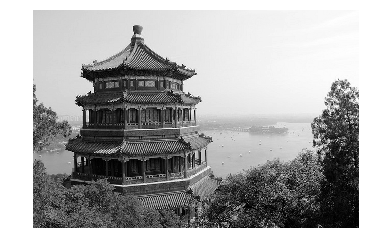

In [6]:
#image = china[150:220, 130:250]
image = china
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

print(images.shape," ")
plot_image(images[0, :, :, 0])
#save_fig("china_original", tight_layout=False)
plt.show()

**Comments:** <br>
1. From the two chunks above, we can see that `image = china[150:220, 130:250]` just takes a subsection of the matrix of the original `china` matrix. Then we can plot that matrix and it just plots a cropped version of the original photo, only zoomed in on a portion of the pagoda.

2. Lines 71 and 72 define a feature map to use when convolving across the picture matrix then computes the convolution given that feature map and stride shape. Here we are using a basic [1,1,1,1] stride. The first feature map is a vertical translation of the image and the second is a horizontal translation.

### Part 3-8: `tf.conv1_2.py`
3. What does the line `X_reshaped = tf.reshape(X, shape = [−1, height, width, channels])` do?
4. Explain what is set up in lines 47-53.
5. Explain lines 55-56. What do the parameters of the pool command `ksize` and `strides` do? Why is `pool3` reshaped? How does the pooling work?
6. What is `fc1`?
7. What is `Y_proba` in line 63?
8. Explain what is going on in lines 71-73.

In [ ]:
# Demonstrate tensorflow convolution 1
# from 13_convolutional_network.ipynb from Geron's github

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
# matplotlib inline

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
#Begin lines 47-53 ---------------------
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")
#End lines 47-53 -----------------------

with tf.name_scope("pool3"):
    #Begin lines 55-56 -----------------
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
    #End lines 55-56 -------------------

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    #Line 63 below ---------------------
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

#Begin lines 71-73 ---------------------
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
#End lines 71-73 -----------------------

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
				
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

n_epochs = 5
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")
							

**Comments:** <br>
3. This line reshapes the input x data from a 784 length vector (28x28 pixels) to an 28x28 array that can then be convolved over. Unlike in a simple multi perceptron model, we need our data to be in an image like array to perform convolution. The -1 in the first element of the array defining the new shape is a placeholder to dynamically reshape the x data given how many training samples we have. The other values are defined as 28, 28, and 1 respectively because we have a 28x28 pixel image that is in greyscale (if it were color, we would have a 3 instead of 1 because of the RBG spectrum).
4. Lines 47 through 53 define the two layers of convolution. Instead of the simple single layer in part 1. We are going to convolve twice, first by feeding in the original matrix into the first layer and then the convolved matrix matrix into the second layer. The output of the first layer has the same shape, except that the number of channels is now 32 instead of 1. The second layer outputs a 14x14 matrix with 64 output channels, this is where some pooling is done, however we are increasing our output channel size from 32 to 64. Not that the stride size determines the size of our output matrix (1 stride size keeps the same dimensions from the input to output, 2 stride sizes makes the output dimensions half of the input 28$\rightarrow$14).
5. Lines 55 and 56 pool the second convolved layer and then flatten the matrix into a $1*length$ vector to use as the input to the fully connected layer. `ksize` defines the kernel size to perform pooling and `strides` as the stride length. So a [1,2,2,1] kernel size means we have a 2x2 kernel frame moving across one sample and one output channel. Similarly, a [1,2,2,1] stride means we are moving 2 pixels in the x and y direction, again one sample and output channel at a time. Pooling is done by taking the max value in each kernel. Finally, `pool3_flat` reshapes the pooled 7x7 matrix with 64 output channels to a 3136 length vector for the fully connected network.
6. `fc1` creates a dense layer that goes from the 3136 length input vector `pool3_flat` down to a 64 node output. This stands for fully connected layer 1. The activations are ReLU activations (which is what we have also seen in our convolution layers). The resulting `fc1` is the input to the second final layer of the fully connected network that goes from 64 nodes to 10 nodes (each standing for the predicted digit in the input image).
7. `Y_proba` calculates the softmax output for the input `logits`, which is the second layer of the fully connected layer. It is a dense layer that goes from 46 nodes to 10 nodes (each standing for the predicted digit in the input image, as said above). `Y_proba` is then the actually probility that the image is each of the 10 digits.
8. Lines 71 through 73 determine if the real label is the top predicted label and then calculates the total accuracy for the batch of data. `tf.nn.in_top_k(logits, y, 1)` returns a true of false (1 or 0) if the the value of y is in the top 1 of logits (i.e. if the top prediction is equal to the true label. Thus, `tf.reduce_mean(tf.cast(correct, tf.float32))` calculates the mean accuracy (sum of all trues over the total number of data samples).

### Parts 9-10: `tf.conv1_3.py`
9. Explain how the dropout (lines 66-69) works.
10. Explain what early stopping is, and how it is implemented in the program.

In [ ]:
# Demonstrate tensorflow convolution 1
# from 13_convolutional_network.ipynb from Geron's github

# The following CNN is similar to the one defined above (tfconv1_2.py),
# except using stride 1 for the second convolutional layer (rather than 2),
# with 25% dropout after the second convolutional layer,
# 50% dropout after the fully connected layer, and trained
# using early stopping.
# It achieves around 99.2% accuracy on MNIST. This is not state of the art,
# but it is not bad.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import tensorflow as tf

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)
#Begin lines 66-69 ------------------
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)
#End lines 66-69 --------------------
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

# The get_model_params() function gets the model's state (i.e., the value 
# of all the variables), and the restore_model_params() restores a previous 
# state. This is used to speed up early stopping: instead of storing the
# best model found so far to disk, we just save it to memory.
# At the end of training, we roll back to the best model found.

def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)


#  This implementation of Early Stopping works like this:
#   - every 100 training iterations, it evaluates the model on
#       the validation set,
#   - if the model performs better than the best model found so far,
#      then it saves the model to RAM,
#   - if there is no progress for 100 evaluations in a row,
#      then training is interrupted,
#   - after training, the code restores the best model found.

n_epochs = 5
batch_size = 150

best_loss_val = np.infty
check_interval = 100
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

**Comments:** <br>
9. In lines 66 to 69, dropout is performed on the output of the first fully connected layer. `fc1` uses the `tf.layers.dense` function to reduce the `pool3_flat_drop` input from 12544 nodes to 128 nodes. Then, dropout is performed on the resulting 128 nodes to set `fc1_dropout_rate` of them to 0. Here, that rate is 0.5, so we are setting half of these node values to 0. As we saw in previous assignments, this is similar to regularization of a network. It forces out network to learn more distinct features in the data.
10. Early stopping restores our model parameters for the best previous model parameters if the loss value at 100 iterations of training is not less than the best loss value. If the current loss value is less than the best value, then the current model parameters are stored as the best model parameters. Then another round of evaluations are performed, with the same early stopping mechanism. Below, we can see how this is implemented. We calculate the loss and then reset the `best_loss_val` if the current loss is below and we also set the `best_model_params` to the current parameters.
            ```python
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
            ```
At the end, all the parameters are always restored to the best model parameters via: `restore_model_params(best_model_params)`. Then the test accuracy is calculated.

## Problem 2 - PCA and Autoencoders

1. Principal Component Analysis (PCA) is a very common machine learning method for dimensionality
reduction. Conceptually, describe how the principal components in PCA are chosen. If PCA is to
implemented in TensorFlow, the function `tf.svd()` will play an important role in the algorithm. Please
briefly describe what this function does, and why the results will be useful in implementing PCA. <br>
**Comments:** <br>
Conceptually, principal components are the orthogonal vectors of the most variation in the data. Principal Components Analysis (PCA) is an algorithm to find these directions. PCA is a dimensionality reduction tool; by choosing the principal components with the most variation we can represent the original data in a lower rank matrix. PCA requires the computation of the eigenvectors and values of the covariance matrix for the original data. Singluar value decomposition (SVD) allows us to identify the principal components without calculating the covariance matrix. `tf.svd()` performs a SVD of the input matrix, giving us U,S, and V (the left singular vectors, the singular values, and right singular vectors respectively), which we can then use to implement PCA. It turns out that the singular values are equal to the square root of the eigenvalues of the covariance matrix. We can then represent the data in a lower dimension using the first k columns of $U$ and the k-by-k matrix in $S$ and the first k rows of $V^T$.

2. Using Tensorflow, implement linear autoencoders on the MNIST dataset with a single hidden layer with
4, 8, and 16 nodes. Select two test examples of your results. Compare the results of your autoencoder
with the original images. Include in your report both the original images and the reconstructed images
(there should be 8 images in total).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

num_inputs=784    #28x28 pixels
num_hidlay=16
num_outputs=num_inputs
learnrate=0.01
actf=tf.nn.relu

X=tf.placeholder(tf.float32,shape=[None,num_inputs])
initializer=tf.variance_scaling_initializer()

w1=tf.Variable(initializer([num_inputs,num_hidlay]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hidlay,num_outputs]),dtype=tf.float32)

b1=tf.Variable(tf.zeros(num_hidlay))
b2=tf.Variable(tf.zeros(num_outputs))

hid_layer=actf(tf.matmul(X,w1)+b1)
output_layer=actf(tf.matmul(hid_layer,w2)+b2)

loss=tf.reduce_mean(tf.square(output_layer-X))

optimizer=tf.train.AdamOptimizer(learnrate)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()

num_epoch=5
batch_size=150
num_test_images=2

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        
        num_batches=mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        
    results_16nodes=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
epoch 0 loss 0.06122384965419769
epoch 1 loss 0.059434711933135986
epoch 2 loss 0.06270444393157959
epoch 3 loss 0.061118900775909424
epoch 4 loss 0.06425907462835312


In [11]:
num_inputs=784    #28x28 pixels
num_hidlay=8
num_outputs=num_inputs
learnrate=0.01
actf=tf.nn.relu

X=tf.placeholder(tf.float32,shape=[None,num_inputs])
initializer=tf.variance_scaling_initializer()

w1=tf.Variable(initializer([num_inputs,num_hidlay]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hidlay,num_outputs]),dtype=tf.float32)

b1=tf.Variable(tf.zeros(num_hidlay))
b2=tf.Variable(tf.zeros(num_outputs))

hid_layer=actf(tf.matmul(X,w1)+b1)
output_layer=actf(tf.matmul(hid_layer,w2)+b2)

loss=tf.reduce_mean(tf.square(output_layer-X))

optimizer=tf.train.AdamOptimizer(learnrate)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()

num_epoch=5
batch_size=150
num_test_images=2

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        
        num_batches=mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        
    results_8nodes=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

epoch 0 loss 0.06970789283514023
epoch 1 loss 0.0706101506948471
epoch 2 loss 0.06944820284843445
epoch 3 loss 0.06979600340127945
epoch 4 loss 0.0690675899386406


In [12]:
num_inputs=784    #28x28 pixels
num_hidlay=4
num_outputs=num_inputs
learnrate=0.01
actf=tf.nn.relu

X=tf.placeholder(tf.float32,shape=[None,num_inputs])
initializer=tf.variance_scaling_initializer()

w1=tf.Variable(initializer([num_inputs,num_hidlay]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hidlay,num_outputs]),dtype=tf.float32)

b1=tf.Variable(tf.zeros(num_hidlay))
b2=tf.Variable(tf.zeros(num_outputs))

hid_layer=actf(tf.matmul(X,w1)+b1)
output_layer=actf(tf.matmul(hid_layer,w2)+b2)

loss=tf.reduce_mean(tf.square(output_layer-X))

optimizer=tf.train.AdamOptimizer(learnrate)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()

num_epoch=5
batch_size=150
num_test_images=2

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        
        num_batches=mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        
    results_4nodes=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

epoch 0 loss 0.07309553027153015
epoch 1 loss 0.07281115651130676
epoch 2 loss 0.07222335785627365
epoch 3 loss 0.07169827073812485
epoch 4 loss 0.07133393734693527


epoch 0 loss 0.02026127651333809
epoch 1 loss 0.020643213763833046
epoch 2 loss 0.01970677450299263
epoch 3 loss 0.01960010826587677
epoch 4 loss 0.01936507597565651


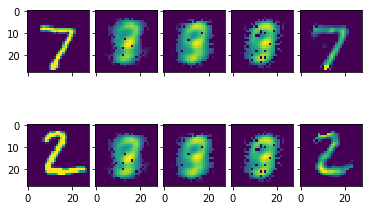

In [13]:
num_inputs=784    #28x28 pixels
num_hidlay=128
num_outputs=num_inputs
learnrate=0.01
actf=tf.nn.relu

X=tf.placeholder(tf.float32,shape=[None,num_inputs])
initializer=tf.variance_scaling_initializer()

w1=tf.Variable(initializer([num_inputs,num_hidlay]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hidlay,num_outputs]),dtype=tf.float32)

b1=tf.Variable(tf.zeros(num_hidlay))
b2=tf.Variable(tf.zeros(num_outputs))

hid_layer=actf(tf.matmul(X,w1)+b1)
output_layer=actf(tf.matmul(hid_layer,w2)+b2)

loss=tf.reduce_mean(tf.square(output_layer-X))

optimizer=tf.train.AdamOptimizer(learnrate)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()

num_epoch=5
batch_size=150
num_test_images=2

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        
        num_batches=mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        
    results_128nodes=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

    #Comparing original images with reconstructions
f,a=plt.subplots(num_test_images,5,sharex='col',sharey='row')
f.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(num_test_images):
    a[i][0].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[i][1].imshow(np.reshape(results_16nodes[i],(28,28)))
    a[i][2].imshow(np.reshape(results_8nodes[i],(28,28)))
    a[i][3].imshow(np.reshape(results_4nodes[i],(28,28)))
    a[i][4].imshow(np.reshape(results_128nodes[i],(28,28)))

**Comments:** <br>
We can see above that for the single hidden layer autoencoders with 16, 8 and 4 all of the reconstructions are very poor (columns 2,3 and 4 respectively). There is no clear resemblance of the original image. I was worried that this meant I had done something completely wrong. However, when I added an additional experiment (single hidden layer autoencoder with 128 hidden nodes) I saw that the reconstruction was significantly better (final column). This suggests that the reason my initial reconstructions were bad is because we are trying to condense the data into too few nodes too quickly in the encoding process, so we are losing most of the structure in the data. This also is likely to explain why some of the pixels are randomly blank in some of the reconstructions. It is possible that with extensive training it would improve, but I wanted to keep it uniform and make sure the code did not run excessively long. This code is adapted from the following online tutorial: https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3

3. Describe the similarity between PCA and an autoencoder. <br>
**Comments:** <br>
As mentioned above, PCA is a form of dimensionality reduction where the data is projected onto the eigenvectors of the covariance matrix. We want to represent the data in fewer dimensions by using the eigenvectors with the most variation in the data. This allows us to essentially visualize the data in a new, lower-dimensional space where the eigenvectors are the basis of the space and are called the principal components. For example, the first principal component will always give the points on a line with the largest variance.
<br>
Autoencoders are also a way to reduce the dimensions of the data. In fact, we take the original input data and feed it into a multi-perceptron network to reduce it to a certain set of dimensions, then decode that encoded data back to the original dimension and calculate the loss. This actually allows the network to learn non-linear, latent features in the data. PCA only allows us to reprsent the data in a new linear basis given the eigenvectors with the most variance. Unfortunately, this means that the features identified when using an autoencoder are often less interpretable than in PCA.

4. What is the difference between a convolutional autoencoder and linear autoencoder? <br>
**Comments:** <br>
The only significant difference in network architecture between the convolutional and linear autoencoders is that the fully connected multi-perceptron layers in the vanilla linear autoencoder are replaced with convolution and pooling layers. This allows the network to learn actually visible features (such as edges and corners) better than in the simple linear autoencoder model (where images are just treated as single dimensional vectors).

5. What similarities and differences are there between a denoising autoencoder and a variational autoencoder? <br>
**Comments:** <br>
Denoising autoencoders are simply vanilla linear autoencoders where random noise (usually Gaussian) is added to the input image and the network is otpmized to reconstruct the original image (without the noise). The autoencoder thus denoises the input to reconstruct the original. However, like linear autoencoders, denoising autoencoders only represent the data as a single encoded vector before decoding. Variational autoencoders, on the other hand, encode the data as a vector of means and a vector of standard deviations for latent Gaussian distribtuions. Instead of encoding as a single vector, the variational autoencoder encodes an image as a set of Gaussian distributions. Therefore, the autoencoder learns not an exact encoding but slight noisy variations of the encoding based on these Gaussian distributions.